In [1]:
## Import Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import ipaddress
import logging

In [2]:
# Load Datasets
def load_datasets():
    credit_card_df = pd.read_csv('../data/creditcard.csv')
    fraud_data_df = pd.read_csv('../data/Fraud_Data.csv')
    ip_address_df = pd.read_csv('../data/IpAddress_to_Country.csv')
    return credit_card_df, fraud_data_df, ip_address_df
# Load datasets
credit_card_df, fraud_data_df, ip_address_df = load_datasets()

In [3]:
# Function to load and analyze data
def analyze_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data from {file_path}")
        print("\nHead of the DataFrame:")
        display(df.head())
        print("\nInfo of the DataFrame:")
        display(df.info())
        print("\nDescribe the DataFrame:")
        display(df.describe(include='all'))
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Analyze creditcard dataset
print("Analyzing creditcard dataset")
analyze_data('../data/creditcard.csv')
print("="*80)

Analyzing creditcard dataset
Data from ../data/creditcard.csv

Head of the DataFrame:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

None


Describe the DataFrame:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# fraud_data_df 
print("Analyzing fraud_data dataset")
analyze_data('../data/Fraud_Data.csv')
print("="*80)

Analyzing fraud_data dataset
Data from ../data/Fraud_Data.csv

Head of the DataFrame:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


None


Describe the DataFrame:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-06-10 07:02:20,2015-07-17 23:22:55,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


In [5]:
 # ip_address_df 
print("Analyzing IpAddress_to_Country dataset")
analyze_data('../data/IpAddress_to_Country.csv')
print("="*80)

Analyzing IpAddress_to_Country dataset
Data from ../data/IpAddress_to_Country.csv

Head of the DataFrame:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China



Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None


Describe the DataFrame:


,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


In [6]:
def check_missing_values(df):
    """
    Checks for missing values in the three DataFrames and displays the results.

    Args:
        credit_card_df (pd.DataFrame): The creditcard.csv DataFrame.
        fraud_data_df (pd.DataFrame): The Fraud_Data.csv DataFrame.
        ip_address_df (pd.DataFrame): The IpAddress_to_Country.csv DataFrame.
    """
    
    print(df.isnull().sum())
print("Missing Values in Credit Card DataFrame:")
check_missing_values(credit_card_df)

Missing Values in Credit Card DataFrame:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
print("\nMissing Values in Fraud Data DataFrame:")
check_missing_values( fraud_data_df)


Missing Values in Fraud Data DataFrame:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [8]:
print("\nMissing Values in IP Address DataFrame:")
check_missing_values( ip_address_df)


Missing Values in IP Address DataFrame:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [9]:
# Handle Missing Values
def handle_missing_values(df):
    return df.dropna()

# Example usage
credit_card_df = handle_missing_values(credit_card_df)
fraud_data_df = handle_missing_values(fraud_data_df)
ip_address_df= handle_missing_values(ip_address_df)

In [10]:
# Data Cleaning
def clean_data(df):
    return df.drop_duplicates()

# Example usage
credit_card_df = clean_data(credit_card_df)
fraud_data_df = clean_data(fraud_data_df)
ip_address_df= clean_data(ip_address_df)

In [11]:
# Correct Data Types
def correct_data_types(fraud_data_df):
    fraud_data_df['signup_time'] = pd.to_datetime(fraud_data_df['signup_time'])
    fraud_data_df['purchase_time'] = pd.to_datetime(fraud_data_df['purchase_time'])
    fraud_data_df['ip_address'] = fraud_data_df['ip_address'].apply(int)
    return fraud_data_df


# Example usage
fraud_data_df = correct_data_types(fraud_data_df)

In [12]:
fraud_data_df 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0


In [13]:
# Exploratory Data Analysis (EDA)
def univariate_analysis(df):
    return df.describe()

# Example usage
print("Credit Card Data - Univariate Analysis:")
print(univariate_analysis(credit_card_df))

Credit Card Data - Univariate Analysis:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557

In [14]:
print("Fraud Data - Univariate Analysis:")
print(univariate_analysis(fraud_data_df))

Fraud Data - Univariate Analysis:
             user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.500000       4

Numerical Features: ['user_id', 'purchase_value', 'age', 'ip_address', 'class']


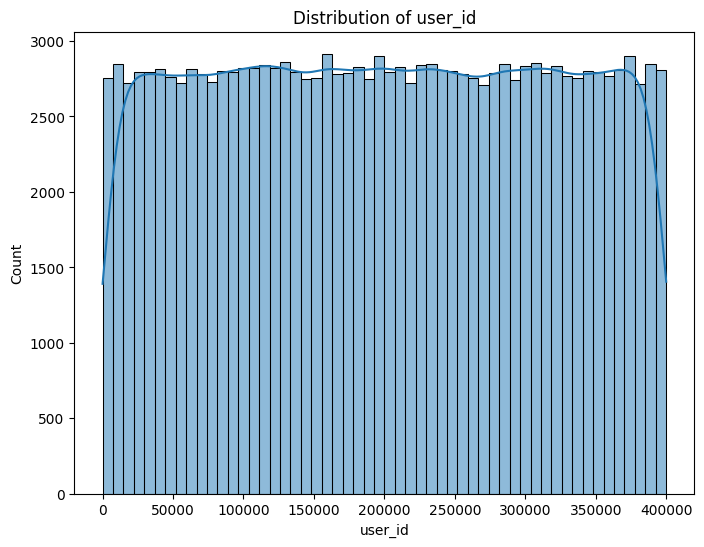

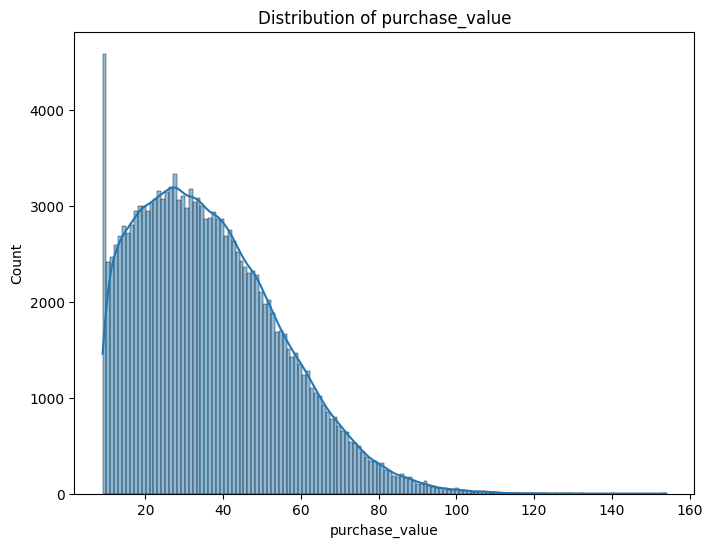

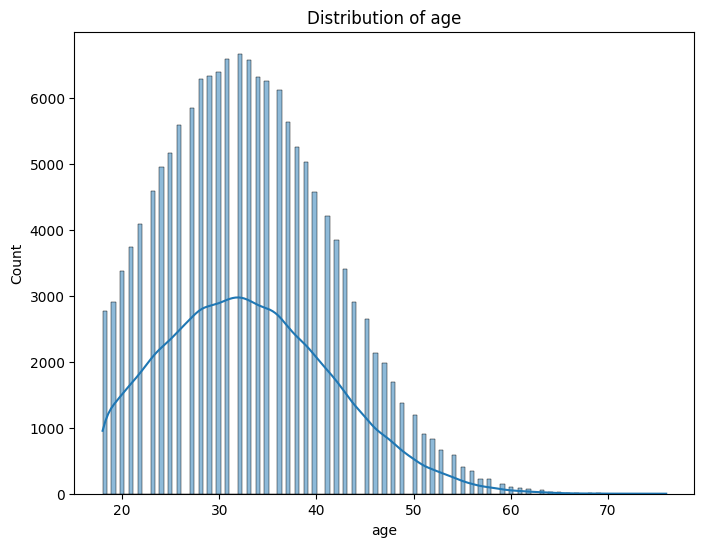

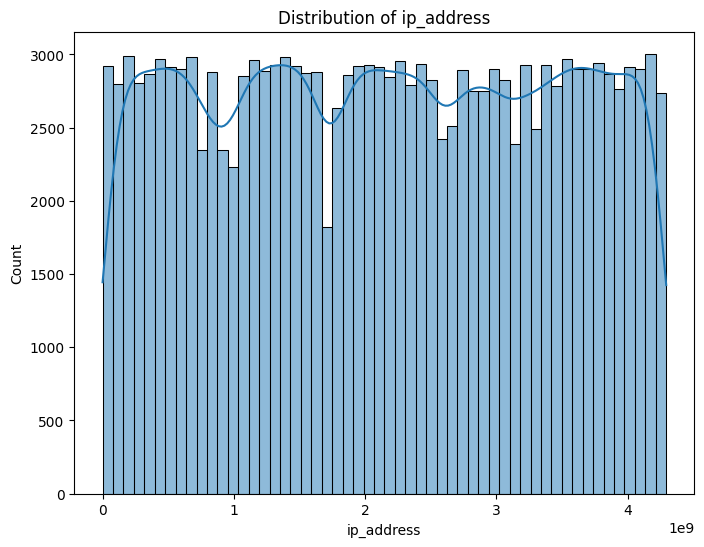

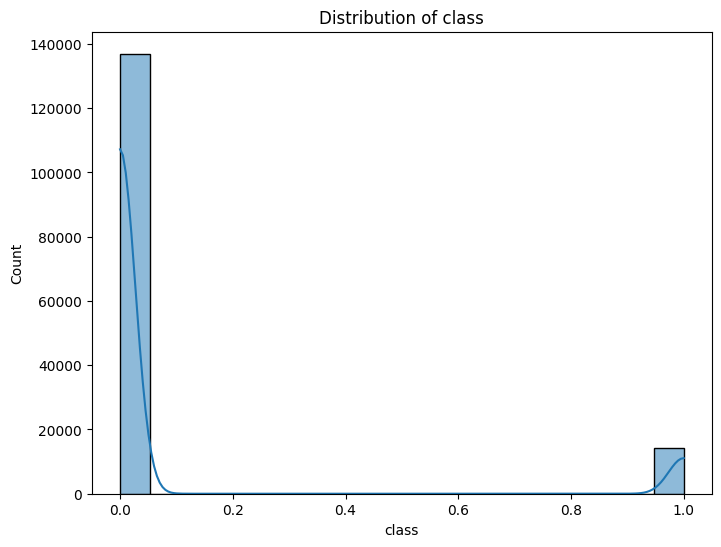

In [15]:
def pdf_univariate(df):
    # Visualize distributions of numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")
    for col in df.select_dtypes(include=np.number):
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

pdf_univariate(fraud_data_df)

Numerical Features: ['user_id', 'purchase_value', 'age', 'ip_address', 'class']


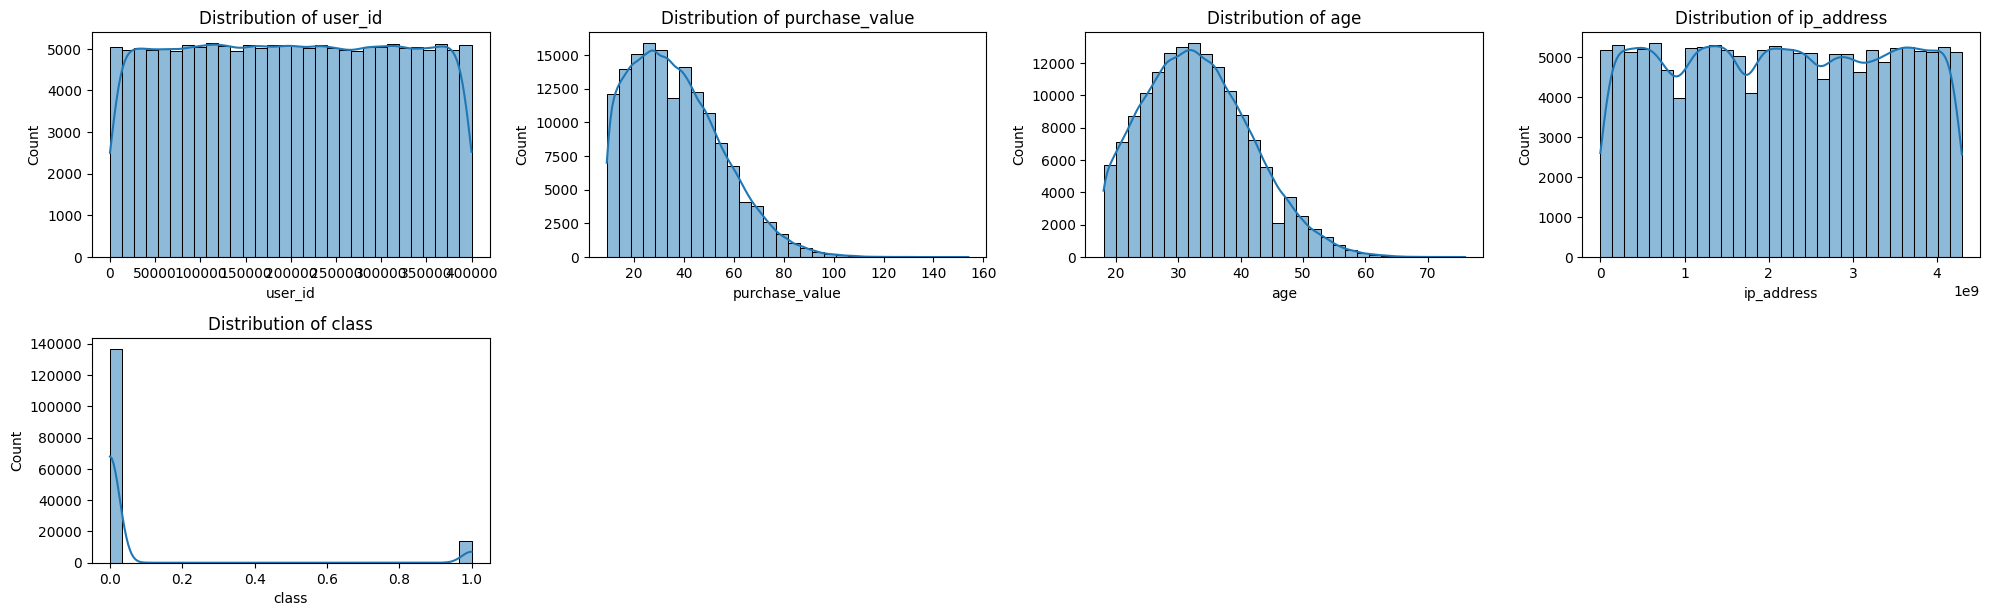

In [16]:
def plot_numerical_distribution(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")

    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numerical_features):
        plt.subplot(5, 4, i + 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Plot numerical feature distribution
plot_numerical_distribution(fraud_data_df)

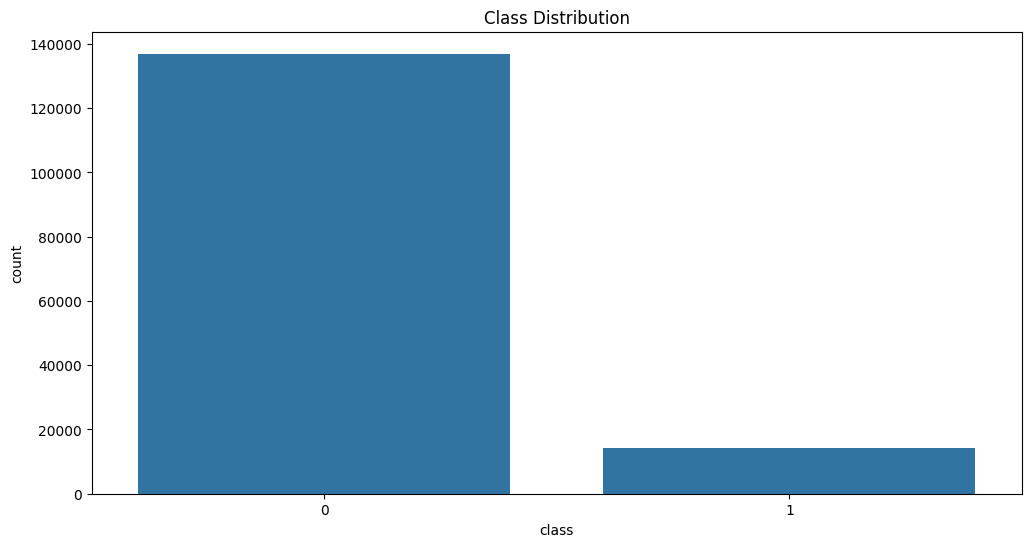

In [17]:
def univariate_analysis_2():
   plt.figure(figsize=(12, 6))
   sns.countplot(x='class', data=fraud_data_df)
   plt.title('Class Distribution')
   plt.show()
univariate_analysis_2()

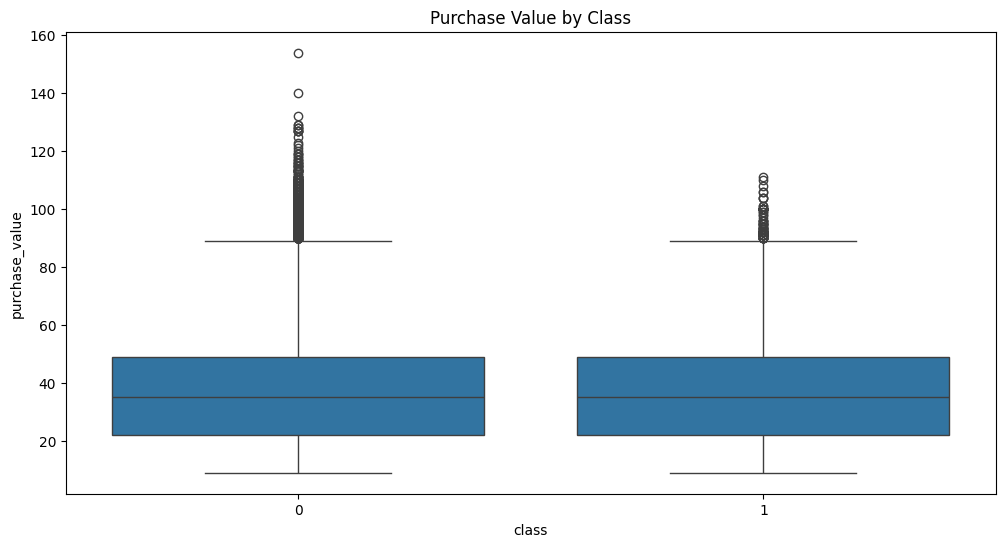

In [18]:
def bivariate_analysis_1():
 plt.figure(figsize=(12, 6))
 sns.boxplot(x='class', y='purchase_value', data=fraud_data_df)
 plt.title('Purchase Value by Class')
 plt.show()
bivariate_analysis_1()

In [20]:
# Merge Datasets for Geolocation Analysis
def convert_ip_to_integer(ip_address_df):
    
    ip_address_df['lower_bound_ip_address'] = ip_address_df['lower_bound_ip_address'].apply(int)
    ip_address_df['upper_bound_ip_address'] = ip_address_df['upper_bound_ip_address'].apply(int)
    
    return ip_address_df

# Example usage
ip_address_df = convert_ip_to_integer(ip_address_df)

In [21]:
ip_address_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China
...,...,...,...
138841,3758092288,3758093311,Hong Kong
138842,3758093312,3758094335,India
138843,3758095360,3758095871,China
138844,3758095872,3758096127,Singapore


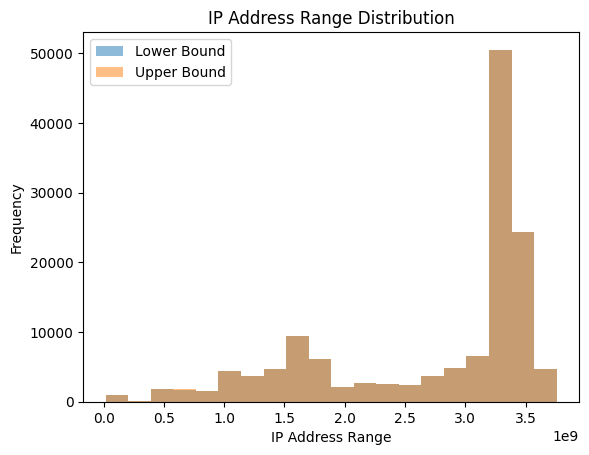

In [22]:
def ip_address_df_range(df):
    # 1. IP Address Range Distribution (Histogram)
    plt.hist(df['lower_bound_ip_address'], bins=20, alpha=0.5, label='Lower Bound')
    plt.hist(df['upper_bound_ip_address'], bins=20, alpha=0.5, label='Upper Bound')
    plt.xlabel('IP Address Range')
    plt.ylabel('Frequency')
    plt.title('IP Address Range Distribution')
    plt.legend()
    plt.show()
    
ip_address_df_range(ip_address_df)

In [23]:
ip_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [24]:
# Merge Datasets
# Map IP addresses to countries
def ip_to_country(ip):
    ip = int(ip)
    country = ip_address_df[(ip_address_df['lower_bound_ip_address'] <= ip) &
                              (ip_address_df['upper_bound_ip_address'] >= ip)]
    if not country.empty:
        return country['country'].values[0]
    return 'unknown'
fraud_data_df['country'] = fraud_data_df['ip_address'].apply(ip_to_country)

In [25]:
fraud_data_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,United States


In [26]:
fraud_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 13.8+ MB


In [27]:
# Feature Engineering
def transaction_features(fraud_data_df):
    fraud_data_df['transaction_frequency'] = fraud_data_df.groupby('user_id')['user_id'].transform('count')
    fraud_data_df['transaction_velocity'] =fraud_data_df['purchase_value'] / (fraud_data_df['purchase_time'] - fraud_data_df['signup_time']).dt.total_seconds()
    return fraud_data_df
fraud_data_df=transaction_features(fraud_data_df)

In [28]:
fraud_data_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,0.000008
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0.000892
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,1,15.000000
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,unknown,1,0.000089
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,United States,1,0.000008
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,Netherlands,1,0.000038
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,Japan,1,0.000006
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,United States,1,0.000009


In [29]:
def time_based_features(fraud_data_df):
    # Hour of day
    fraud_data_df['hour_of_day'] = fraud_data_df['purchase_time'].dt.hour
    # Day of week
    fraud_data_df['day_of_week'] = fraud_data_df['purchase_time'].dt.dayofweek
    return fraud_data_df
time_based_features(fraud_data_df)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,0.000008,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0.000892,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,1,15.000000,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,unknown,1,0.000089,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,0.000009,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,United States,1,0.000008,0,6
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,Netherlands,1,0.000038,12,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,Japan,1,0.000006,7,2
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,United States,1,0.000009,9,0


In [30]:
def standardize_features(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df

# Standardize Features
standardized_data = standardize_features(fraud_data_df.copy())
print("Standardized Data:")
print(standardized_data.head())

Standardized Data:
    user_id         signup_time       purchase_time  purchase_value  \
0 -1.543857 2015-02-24 22:55:49 2015-04-18 02:47:11       -0.160204   
1  1.154115 2015-06-07 20:39:50 2015-06-08 01:38:54       -1.142592   
2 -1.723272 2015-01-01 18:52:44 2015-01-01 18:52:45       -1.197169   
3 -0.434147 2015-04-28 21:13:25 2015-05-04 13:54:50        0.385567   
4  0.183706 2015-07-21 07:09:52 2015-09-09 18:40:53        0.112681   

       device_id source browser sex       age  ip_address     class  \
0  QVPSPJUOCKZAR    SEO  Chrome   M  0.679914   -1.136880 -0.321436   
1  EOGFQPIZPYXFZ    Ads  Chrome   F  2.304476   -1.443207 -0.321436   
2  YSSKYOSJHPPLJ    SEO   Opera   M  2.304476    0.375916  3.111035   
3  ATGTXKYKUDUQN    SEO  Safari   M  0.911994    1.352348 -0.321436   
4  NAUITBZFJKHWW    Ads  Safari   M  1.376155   -1.390927 -0.321436   

         country  transaction_frequency  transaction_velocity  hour_of_day  \
0          Japan                    0.0          

In [31]:
# Standardize Features
standardized_data = standardize_features(credit_card_df.copy())
print("Standardized Data:")
print(standardized_data.head())

Standardized Data:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -0.701082 -0.041687  1.680101  0.976623 -0.247020  0.348012   
1 -1.996823  0.608792  0.164138  0.109279  0.318998  0.042258 -0.060980   
2 -1.996802 -0.700336 -0.811337  1.174270  0.270648 -0.366756  1.352655   
3 -1.996802 -0.499064 -0.109972  1.187383 -0.608355 -0.008814  0.937245   
4 -1.996781 -0.597606  0.535539  1.025470  0.287092 -0.297036  0.072873   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193700  0.084434  0.333534  ... -0.024777  0.383483 -0.177444  0.110157   
1 -0.065656  0.072903 -0.231703  ... -0.311372 -0.881454  0.162081 -0.561503   
2  0.643223  0.210788 -1.381169  ...  0.343094  1.065068  1.457772 -1.138484   
3  0.192079  0.320843 -1.264664  ... -0.149093  0.007299 -0.305465 -1.941446   
4  0.481517 -0.228725  0.747917  ... -0.012516  1.101780 -0.220709  0.232904   

        V25       V26       V27       V28    Amou

In [32]:
def normalize_features(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    scaler = MinMaxScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df

# Normalize Features
normalized_data = normalize_features(fraud_data_df.copy())
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
    user_id         signup_time       purchase_time  purchase_value  \
0  0.055140 2015-02-24 22:55:49 2015-04-18 02:47:11        0.172414   
1  0.833299 2015-06-07 20:39:50 2015-06-08 01:38:54        0.048276   
2  0.003393 2015-01-01 18:52:44 2015-01-01 18:52:45        0.041379   
3  0.375207 2015-04-28 21:13:25 2015-05-04 13:54:50        0.241379   
4  0.553410 2015-07-21 07:09:52 2015-09-09 18:40:53        0.206897   

       device_id source browser sex       age  ip_address  class  \
0  QVPSPJUOCKZAR    SEO  Chrome   M  0.362069    0.170603    0.0   
1  EOGFQPIZPYXFZ    Ads  Chrome   F  0.603448    0.081554    0.0   
2  YSSKYOSJHPPLJ    SEO   Opera   M  0.603448    0.610371    1.0   
3  ATGTXKYKUDUQN    SEO  Safari   M  0.396552    0.894219    0.0   
4  NAUITBZFJKHWW    Ads  Safari   M  0.465517    0.096752    0.0   

         country  transaction_frequency  transaction_velocity  hour_of_day  \
0          Japan                    0.0          6.676206e-08     0.0

In [33]:
# Normalize Features
normalized_data = normalize_features(credit_card_df.copy())
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253   
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V25       V26       V27       V28    Amount

In [34]:
# Encode Categorical Features
def encode_categorical_features(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df
fraud_data_df = encode_categorical_features(fraud_data_df)

In [35]:
credit_card_df = encode_categorical_features(credit_card_df)

In [36]:
credit_card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
fraud_data_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,2,0,1,39,732758368,0,84,1,0.000008,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,0,0,0,53,350311387,0,171,1,0.000892,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,2,3,1,53,2621473820,1,171,1,15.000000,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,3977,2,4,1,41,3840542443,0,181,1,0.000089,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,68757,0,4,1,45,415583117,0,171,1,0.000009,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,125335,2,0,1,28,3451154526,1,171,1,0.000008,0,6
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,63001,2,4,1,32,2439047221,0,118,1,0.000038,12,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,64204,2,2,0,26,2748470523,0,84,1,0.000006,7,2
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,13118,2,0,1,37,3601174708,0,171,1,0.000009,9,0


In [38]:
# Save preprocessed datasets
fraud_data_df.to_csv('preprocessed_fraud_data.csv', index=False)
credit_card_df.to_csv('preprocessed_creditcard_data.csv', index=False)